## Approach using a KNN

__With Scaling__  
Accuracy 0.87  
Area under the curve 0.75  
Precision 0.29  
Recall 0.60  

__Without Scaling__  
Accuracy 0.86  
Area under the curve 0.71  
Precision 0.27  
Recall 0.53  



In [1]:
#Import all the files to be shared among all notebooks 
import utils
import preprocessing
import data_visualization
import feature_engineering
import ML_algorithms

In [2]:
df = utils.get_dataset()

Apply data transformations

In [3]:
df = preprocessing.encode_education(df)
df = preprocessing.one_hot_encoding(df,columns = ["Marital_Status"])
df = preprocessing.encode_days_as_costumer(df)
df = feature_engineering.drop_useless_columns(df)
df = df.dropna()

In [4]:
df.head()

,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Complain,Response,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,1957,2,58138.0,0,0,663,58,635,88,546,...,0,1,0,0,0,0,1,0,0,0
1,1954,2,46344.0,1,1,113,38,11,1,6,...,0,0,0,0,0,0,1,0,0,0
2,1965,2,71613.0,0,0,312,26,426,49,127,...,0,0,0,0,0,0,0,1,0,0
3,1984,2,26646.0,1,0,139,26,11,4,20,...,0,0,0,0,0,0,0,1,0,0
4,1981,4,58293.0,1,0,161,94,173,43,118,...,0,0,0,0,0,1,0,0,0,0


Make the split

In [5]:
X_train, X_test, y_train, y_test = utils.data_split(df, 0.2)

Apply some scaling

In [6]:
min_max_scaler = preprocessing.min_max_scale(X_train)
X_train = min_max_scaler.transform(X_train)
X_test = min_max_scaler.transform(X_test)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


K nearest neighbors

In [7]:
model = ML_algorithms.KNN(X_train, y_train)
y_pred = model.predict(X_test)

Evaluate

Normalized confusion matrix
[[0.96858639 0.03141361]
 [0.70967742 0.29032258]]


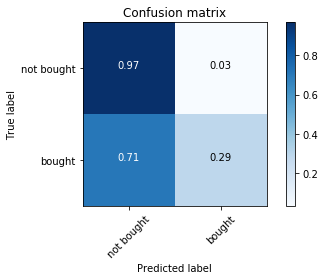

In [8]:
conf_matrix = utils.confusion_matrix(y_test, y_pred)
data_visualization.plot_confusion_matrix(conf_matrix, ['not bought', 'bought'], normalize=True)

In [9]:
print("Accuracy {:1.2f}".format(utils.calculate_accuracy(y_pred, y_test)))
print("Area under the curve {:1.2f}".format(utils.calculate_auc(y_pred, y_test)))
print("Precision {:1.2f}".format(utils.calculate_precision_score(y_pred, y_test)))
print("Recall {:1.2f}".format(utils.calculate_recall_score(y_pred, y_test)))

Accuracy 0.87
Area under the curve 0.75
Precision 0.29
Recall 0.60


How about with Cross validation ? 

In [10]:
X, y = utils.X_y_split(df)
predictions = utils.cross_validation_average_results(ML_algorithms.KNN, X, y, n_splits=10)

Normalized confusion matrix
[[0.96123208 0.03876792]
 [0.86786787 0.13213213]]


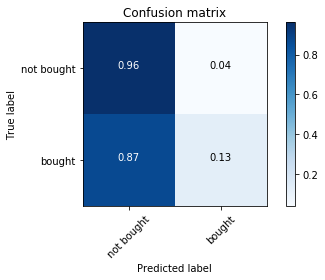

In [11]:
conf_matrix = utils.confusion_matrix(df["Response"], predictions)
data_visualization.plot_confusion_matrix(conf_matrix, ['not bought', 'bought'], normalize=True)

In [12]:
print("Accuracy {:1.2f}".format(utils.calculate_accuracy(df["Response"], predictions)))
print("Area under the curve {:1.2f}".format(utils.calculate_auc(df["Response"], predictions)))
print("Precision {:1.2f}".format(utils.calculate_precision_score(df["Response"], predictions)))
print("Recall {:1.2f}".format(utils.calculate_recall_score(df["Response"], predictions)))

Accuracy 0.84
Area under the curve 0.55
Precision 0.38
Recall 0.13


In [13]:
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [14]:
print("Profit:", utils.profit_share(df["Response"], predictions))

Profit: 0.05
